## Classification model to predict titanic survival
### Author: Gowri S

In this we will be using the python code to predict the titanic survival by taking many factors like age,sex,socio-economic class as input using the machine learning technique called simple linear regression .I will be describing the process in different steps.

### Import neccessary Libraries

In [1]:
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

### Load the dataset and explore

In [2]:
train_df=pd.read_csv(r'C:\Users\hp\Desktop\real world problems data set\bharat intern\train.csv')
test_df=pd.read_csv(r'C:\Users\hp\Desktop\real world problems data set\bharat intern\test.csv')
test_true=pd.read_csv(r'C:\Users\hp\Desktop\real world problems data set\bharat intern\gender_submission.csv')

In [3]:
# Variable	Definition	Key
# survival	Survival	0 = No, 1 = Yes
# pclass	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd
# sex	Sex	
# Age	Age in years	
# sibsp	# of siblings / spouses aboard the Titanic	
# parch	# of parents / children aboard the Titanic	
# ticket	Ticket number	
# fare	Passenger fare	
# cabin	Cabin number	
# embarked	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton

In [4]:
train_df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
test_true

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### Data cleaning

In [8]:
#cabin have too many insufficient data  and Name of passenger is insignificant
train_df.drop(columns=['Name','Cabin','PassengerId','Ticket'],inplace=True)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [9]:
test_df.drop(columns=['Name','Cabin','PassengerId','Ticket'],inplace=True)
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [10]:
train_df['Age'].fillna(train_df['Age'].mean(),inplace=True)
test_df['Age'].fillna(test_df['Age'].mean(),inplace=True)
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 55.8+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      417 non-null    float64
 6   Embarked  418 non-null

(None, None)

In [11]:
train_df=train_df.dropna()
test_df['Fare'].fillna(test_df['Fare'].mean(),inplace=True)
train_df.info(),test_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    object 
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(2)
memory usage: 62.5+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    int64  
 1   Sex       418 non-null    object 
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    int64  
 4   Parch     418 non-null    int64  
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null

(None, None)

In [12]:
from sklearn.preprocessing import LabelEncoder
sex_type=LabelEncoder()
train_df['Sex']=sex_type.fit_transform(train_df['Sex'])
test_df['Sex']=sex_type.fit_transform(test_df['Sex'])

In [13]:
embarked_type=LabelEncoder()
train_df['Embarked']=embarked_type.fit_transform(train_df['Embarked'])
test_df['Embarked']=embarked_type.fit_transform(test_df['Embarked'])

In [14]:
bins=[0,10,25,50,100]
labels=['0','1','2','3']
train_df['Age_group']=pd.cut(train_df['Age'],bins=bins,labels=labels)
test_df['Age_group']=pd.cut(test_df['Age'],bins=bins,labels=labels)
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,1,22.000000,1,0,7.2500,2,1
1,1,1,0,38.000000,1,0,71.2833,0,2
2,1,3,0,26.000000,0,0,7.9250,2,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,2
887,1,1,0,19.000000,0,0,30.0000,2,1
888,0,3,0,29.699118,1,2,23.4500,2,2
889,1,1,1,26.000000,0,0,30.0000,0,2


In [15]:
age_type=LabelEncoder()
train_df['Age_group']=age_type.fit_transform(train_df['Age_group'])
test_df['Age_group']=age_type.fit_transform(test_df['Age_group'])
train_df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,1,22.000000,1,0,7.2500,2,1
1,1,1,0,38.000000,1,0,71.2833,0,2
2,1,3,0,26.000000,0,0,7.9250,2,2
3,1,1,0,35.000000,1,0,53.1000,2,2
4,0,3,1,35.000000,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...,...
886,0,2,1,27.000000,0,0,13.0000,2,2
887,1,1,0,19.000000,0,0,30.0000,2,1
888,0,3,0,29.699118,1,2,23.4500,2,2
889,1,1,1,26.000000,0,0,30.0000,0,2


### Data Visualisation

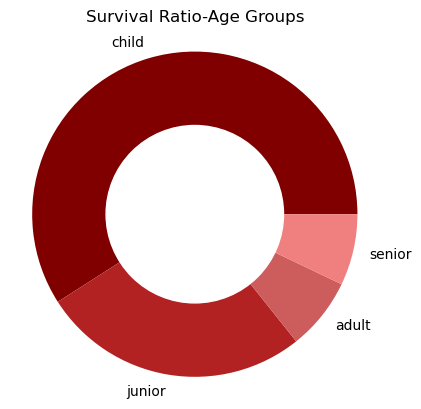

In [16]:
plt.pie(train_df[['Age_group']].value_counts(),labels=['child','junior','adult','senior'],radius=1.1,colors=['maroon','firebrick','indianred','lightcoral'])
center_circle=plt.Circle((0,0),0.6,color='white')
p=plt.gcf()
p.gca().add_artist(center_circle)
plt.title('Survival Ratio-Age Groups')
plt.show()

In [17]:
train_df.drop(columns='Age',inplace=True)
test_df.drop(columns='Age',inplace=True)

In [18]:
train_df.groupby(['Survived']).mean()

,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group
Survived,,,,,,,
0,2.531876,0.852459,0.553734,0.329690,22.117887,1.641166,1.706740
1,1.955882,0.320588,0.476471,0.467647,48.209498,1.364706,1.585294


To see the correlation between different features will help us reduce the dimensionality of the given data set.Its a technique in feature engineering.So by analysing these correlation data and its visualization matrix we can understand that whether or not all these features are necessary to build the model.

In [19]:
train_df.corr()

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group
Survived,1.000000,-0.335549,-0.541585,-0.034040,0.083151,0.255290,-0.169718,-0.082644
Pclass,-0.335549,1.000000,0.127741,0.081656,0.016824,-0.548193,0.164681,-0.239598
Sex,-0.541585,0.127741,1.000000,-0.116348,-0.247508,-0.179958,0.110320,0.102343
SibSp,-0.034040,0.081656,-0.116348,1.000000,0.414542,0.160887,0.068900,-0.246592
Parch,0.083151,0.016824,-0.247508,0.414542,1.000000,0.217532,0.040449,-0.252972
Fare,0.255290,-0.548193,-0.179958,0.160887,0.217532,1.000000,-0.226311,0.038723
Embarked,-0.169718,0.164681,0.110320,0.068900,0.040449,-0.226311,1.000000,-0.058295
Age_group,-0.082644,-0.239598,0.102343,-0.246592,-0.252972,0.038723,-0.058295,1.000000


<Axes: >

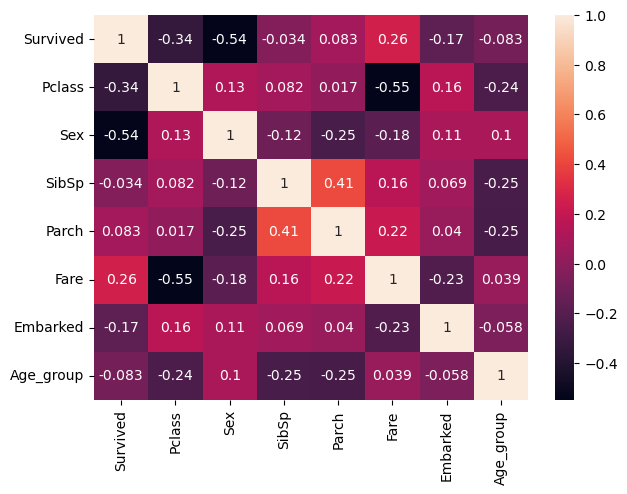

In [20]:
plt.figure(figsize=(7,5))
sn.heatmap(train_df.corr(),annot=True)

sex,Pclass and the Fare are greatly correlated to the survival.

In [21]:
train_df[['Pclass']].value_counts()

Pclass
3         491
1         214
2         184
dtype: int64

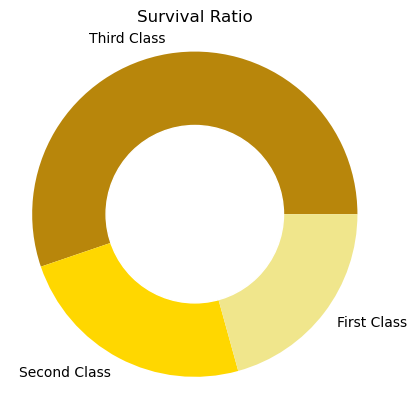

In [22]:
plt.pie(train_df[['Pclass']].value_counts(),labels=['Third Class','Second Class','First Class'],radius=1.1,colors=['darkgoldenrod','gold','khaki',])
center_circle=plt.Circle((0,0),0.6,color='white')
p=plt.gcf()
p.gca().add_artist(center_circle)
plt.title('Survival Ratio')
plt.show()

In [23]:
train_df

,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,Age_group
0,0,3,1,1,0,7.2500,2,1
1,1,1,0,1,0,71.2833,0,2
2,1,3,0,0,0,7.9250,2,2
3,1,1,0,1,0,53.1000,2,2
4,0,3,1,0,0,8.0500,2,2
...,...,...,...,...,...,...,...,...
886,0,2,1,0,0,13.0000,2,2
887,1,1,0,0,0,30.0000,2,1
888,0,3,0,1,2,23.4500,2,2
889,1,1,1,0,0,30.0000,0,2


### Model Building

In [24]:
X_train=train_df.drop(columns='Survived')
Y_train=train_df['Survived']

In [25]:
X_train.shape,Y_train.shape

((889, 7), (889,))

### Create and train Decision Tree Classifier 

In [26]:
from sklearn.tree import DecisionTreeClassifier
survival_model=DecisionTreeClassifier()
survival_model.fit(X_train,Y_train)

DecisionTreeClassifier()

In [27]:
survival_model.score(X_train,Y_train)

0.9403824521934758

### Use the trained model to make predictions on the test data

In [28]:
y_predicted=survival_model.predict(test_df)
y_predicted

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [29]:
y_test=test_true['Survived']

### Evaluate the models performance using matrics like accuracy,confution matric and classification report

In [30]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [31]:
accuracy=accuracy_score(y_test,y_predicted)
accuracy

0.8444976076555024

In [32]:
cm=confusion_matrix(y_test,y_predicted)
print(cm)

[[232  34]
 [ 31 121]]


In [33]:
class_report=classification_report(y_test,y_predicted)
print(class_report)

              precision    recall  f1-score   support

           0       0.88      0.87      0.88       266
           1       0.78      0.80      0.79       152

    accuracy                           0.84       418
   macro avg       0.83      0.83      0.83       418
weighted avg       0.85      0.84      0.84       418



### Create and train Random Forest Classifier

In [34]:
from sklearn.ensemble import RandomForestClassifier
survival_model_forest=RandomForestClassifier(n_estimators=10)
survival_model_forest.fit(X_train,Y_train)

RandomForestClassifier(n_estimators=10)

In [35]:
survival_model_forest.score(X_train,Y_train)

0.9358830146231721

### Use the trained Random Forest Classifier model to make predictions on the test data

In [36]:
y_predicted_forest=survival_model_forest.predict(test_df)
y_predicted_forest

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,

### Evaluate the Random Forest Classifier models performance using matrics like accuracy,confution matric and classification report

In [37]:
from sklearn.metrics import confusion_matrix

In [38]:
accuracy_forest=accuracy_score(y_test,y_predicted_forest)
accuracy_forest

0.8516746411483254

In [39]:
cm_forest=confusion_matrix(y_test,y_predicted_forest)
cm_forest

array([[235,  31],
       [ 31, 121]], dtype=int64)

In [40]:
class_report_forest=classification_report(y_test,y_predicted_forest)
print(class_report_forest)

              precision    recall  f1-score   support

           0       0.88      0.88      0.88       266
           1       0.80      0.80      0.80       152

    accuracy                           0.85       418
   macro avg       0.84      0.84      0.84       418
weighted avg       0.85      0.85      0.85       418



### decision tree algorithm works better!